In [114]:
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [115]:
df = pd.read_csv("breast_cancer.csv")

In [116]:
df.sample(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
70,no-recurrence-events,60-69,ge40,10-14,0-2,no,1,left,left_low,no
151,no-recurrence-events,60-69,ge40,30-34,3-5,yes,3,left,left_low,no
232,recurrence-events,30-39,premeno,30-34,3-5,no,3,right,left_up,yes
71,no-recurrence-events,40-49,premeno,25-29,0-2,no,2,right,left_up,no
255,recurrence-events,40-49,premeno,30-34,6-8,yes,3,right,left_up,no


In [117]:
df.shape

(286, 10)

In [118]:
print("class : ", np.unique(df['class'].values))
print("age : ", np.unique(df['age'].values))
print("menopause : ", np.unique(df['menopause'].values))
print("tumor-size : ", np.unique(df['tumor-size'].values))
print("inv-nodes : ", np.unique(df['inv-nodes'].values))
print("node-caps : ", np.unique(df['node-caps'].values))
print("deg-malig : ", np.unique(df['deg-malig'].values))
print("breast : ", np.unique(df['breast'].values))
print("breast-quad : ", np.unique(df['breast-quad'].values))
print("irradiat : ", np.unique(df['irradiat'].values))

class :  ['no-recurrence-events' 'recurrence-events']
age :  ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79']
menopause :  ['ge40' 'lt40' 'premeno']
tumor-size :  ['0-4' '10-14' '15-19' '20-24' '25-29' '30-34' '35-39' '40-44' '45-49'
 '5-9' '50-54']
inv-nodes :  ['0-2' '12-14' '15-17' '24-26' '3-5' '6-8' '9-11']
node-caps :  ['?' 'no' 'yes']
deg-malig :  [1 2 3]
breast :  ['left' 'right']
breast-quad :  ['?' 'central' 'left_low' 'left_up' 'right_low' 'right_up']
irradiat :  ['no' 'yes']


In [119]:
df = df[(df['node-caps'] != '?') & (df['breast-quad'] != '?')]
df.shape

(277, 10)

In [120]:
df.loc[df['class'] == 'recurrence-events','class'] = 1
df.loc[df['class'] == 'no-recurrence-events','class'] = 2

In [121]:
df.loc[df['age'] == '20-29','age'] = 1
df.loc[df['age'] == '30-39','age'] = 2
df.loc[df['age'] == '40-49','age'] = 3
df.loc[df['age'] == '50-59','age'] = 4
df.loc[df['age'] == '60-69','age'] = 5
df.loc[df['age'] == '70-79','age'] = 6

In [122]:
df.loc[df['menopause'] == 'lt40','menopause'] = 1
df.loc[df['menopause'] == 'ge40','menopause'] = 2
df.loc[df['menopause'] == 'premeno','menopause'] = 3

In [123]:
tumorsize_values = np.array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54'])

for i in range(len(tumorsize_values)):
    tumorsize = tumorsize_values[i]
    df.loc[df['tumor-size'] == tumorsize, 'tumor-size'] = i+1

In [124]:
invnodes_values = np.array(['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'])

for i in range(len(invnodes_values)):
    invnode = invnodes_values[i]
    df.loc[df['inv-nodes'] == invnode, 'inv-nodes'] = i+1

In [125]:
df.loc[df['node-caps'] == 'no','node-caps'] = 0
df.loc[df['node-caps'] == 'yes','node-caps'] = 1

In [126]:
df.loc[df['irradiat'] == 'no','irradiat'] = 0
df.loc[df['irradiat'] == 'yes','irradiat'] = 1

In [127]:
df.drop(['breast', 'breast-quad'], axis=1, inplace=True) # keep ordinal values only
df.sample(5)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,irradiat
101,2,4,2,7,1,0,3,0
262,1,5,2,6,1,0,3,0
46,2,3,3,6,1,0,2,0
139,2,3,3,7,1,0,2,0
177,2,5,2,3,1,0,2,0


In [128]:
vectors = df.values

In [129]:
vectors.shape

(277, 8)

In [130]:
vectors[:,1:]

array([[2, 3, 7, ..., 0, 3, 0],
       [3, 3, 5, ..., 0, 2, 0],
       [3, 3, 5, ..., 0, 2, 0],
       ...,
       [5, 2, 5, ..., 0, 1, 0],
       [3, 2, 7, ..., 0, 3, 0],
       [4, 2, 7, ..., 0, 3, 0]])

In [131]:
dataset = LabeledSet(7)
dataset.addExamples(vectors[:,1:], vectors[:,0:1])

In [132]:
g = Log()
h = Sum()

# rank Shannon discrimination measure
f_r = Dsr()
rsdm = Gdm(h, g, f_r)

# conditional Shannon entropy
f = Ds()
sdm = Gdm(h, g, f)

# pessimistic rank discrimination measure
f_p = Mindsr()
g_p = Frac() 
prdm = Gdm(h, g_p, f_p)

In [133]:
train_set, test_set = split_dataset(dataset, 80)

In [175]:
train_set.x[:,2]

array([ 8,  9,  7,  9,  9,  6,  7,  6,  9,  3,  6,  5,  7,  6,  6,  5,  8,
        4,  7,  6,  6,  5,  7,  7,  7,  5,  6,  6,  5, 11,  4,  8,  1,  5,
        5,  5,  5,  5,  6,  7,  7,  8,  7,  6,  4,  7,  7,  6,  6, 11,  8,
        5,  7,  4,  8,  7,  7,  7,  9,  5,  7,  9,  7,  7,  4,  4,  9,  1,
        8,  4,  3,  6,  9,  7,  3,  7,  7,  6,  4,  2,  6,  9,  5,  3,  7,
        7,  5,  5,  7,  1,  8,  6,  7,  9,  6,  5,  6,  6,  6,  5,  6,  9,
        4,  2,  3,  5,  1,  5,  9,  5,  5,  1,  7,  5,  4,  8,  6,  6,  4,
        5,  8,  3,  5,  3,  6,  5,  4,  8,  7,  6,  8,  8,  3,  6,  5,  3,
        8,  7,  3,  4,  6, 10,  3,  5,  7,  5,  7,  7,  1,  3,  4,  5, 11,
        3,  9,  9,  7,  4, 10,  5,  5,  9,  4,  6,  7,  5,  7,  5,  5,  5,
        7,  3,  3,  7,  6,  6,  3,  3,  7,  7,  7,  6,  5,  3,  7,  5,  7,
       11,  7,  7,  6,  6,  6,  5,  4,  5,  6,  7,  5,  7,  3,  6,  4,  5,
        6,  2,  6,  9,  3,  4,  3,  7, 11,  7,  1,  9,  9,  4,  4,  5])

In [174]:
data = np.hstack((test_set.x, test_set.y))
m = test_set.getInputDimension()

In [192]:
E1 = LabeledSet(m)
E2 = LabeledSet(m)

for i in range(test_set.size()):
    if test_set.getX(i)[2] <= 7:
        E1.addExample(test_set.getX(i), test_set.getY(i))
    else:
        E2.addExample(test_set.getX(i), test_set.getY(i))

In [193]:
E2.y

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [194]:
E1 = LabeledSet(m)
E2 = LabeledSet(m)

E1.addExamples(data[data[:,2] <=  7][:,:m], data[data[:,2] <= 7][:,m])
E2.addExamples(data[data[:,2] >  7][:,:m], data[data[:,2] > 7][:,m])

In [201]:
np.reshape(E2.y, (13,))

array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [205]:
np.reshape(E2.y[0], (13,1))

array([[1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2]])

In [170]:
data[data[:,2] == 7][:,:7]

array([[4, 2, 7, 3, 1, 2, 1],
       [4, 2, 7, 2, 0, 3, 0],
       [3, 2, 7, 2, 0, 3, 0],
       [2, 3, 7, 1, 0, 2, 0],
       [3, 3, 7, 5, 1, 3, 1],
       [5, 2, 7, 3, 1, 2, 0],
       [5, 2, 7, 1, 0, 3, 0],
       [3, 3, 7, 1, 0, 1, 0],
       [3, 3, 7, 1, 0, 2, 0]])

In [206]:
tree1 = RDMT(rsdm, "shannon", 0, 100, ceil(0.01 * train_set.size()), [1, 2])
tree1.train(train_set)
tree1.accuracy(test_set)

2.5 13 18 51 138
8.5 12 16 1 2
1.5 1 1 11 15
3.5 9 15 2 0
1.5 0 1 9 14
7.5 7 14 2 0
6.5 5 11 2 3
2.0 0 1 5 10
5.5 3 7 2 3
2.5 2 7 1 0
2.5 0 1 2 6
1.5 1 4 1 2
0.5 0 4 1 0
2.5 0 3 2 0
1.5 1 0 1 3
2.5 1 2 0 1
5.5 51 133 0 5
3.5 21 52 30 81
7.5 19 43 2 9
2.5 3 4 16 39
6.5 3 3 0 1
5.5 2 2 1 1
2.5 1 0 1 2
5.5 14 39 2 0
4.0 14 38 0 1
2.5 13 36 1 2
1.5 0 2 13 34
2.5 0 1 13 33
4.5 2 8 11 25
0.5 2 7 0 1
0.5 1 7 1 0
1.5 0 2 1 5
3.5 0 4 1 1
2.5 8 21 3 4
5.5 3 10 5 11
0.5 1 10 2 0
1.5 1 8 0 2
1.5 0 1 1 7
0.5 4 10 1 1
1.5 3 10 1 0
6.5 2 6 1 4
0.5 1 5 1 1
1.5 0 2 1 3
1.5 1 2 0 2
0.5 3 2 0 2
6.5 1 0 2 2
0.5 1 2 1 0
1.5 2 2 0 7
8.5 1 1 1 1
5.0 29 80 1 1
2.5 22 60 7 20
9.5 21 57 1 3
3.5 20 57 1 0
1.5 0 2 20 55
2.5 0 1 20 54
1.5 0 4 20 50
3.5 1 6 19 44
2.0 0 6 1 0
2.5 15 43 4 1
8.5 13 39 2 4
7.5 12 37 1 2
5.5 5 19 7 18
0.5 4 17 1 2
1.5 3 17 1 0
0.5 3 16 0 1
1.5 1 6 2 10
4.5 0 3 1 3
4.5 0 1 1 2
4.5 1 5 1 5
2.5 1 3 0 2
4.5 0 2 1 1
2.5 0 5 1 0
6.5 2 7 5 11
1.5 2 6 0 1
0.5 1 6 1 0
1.5 0 1 1 5
4.5 0 3 1 2
1.5

0.7368421052631579

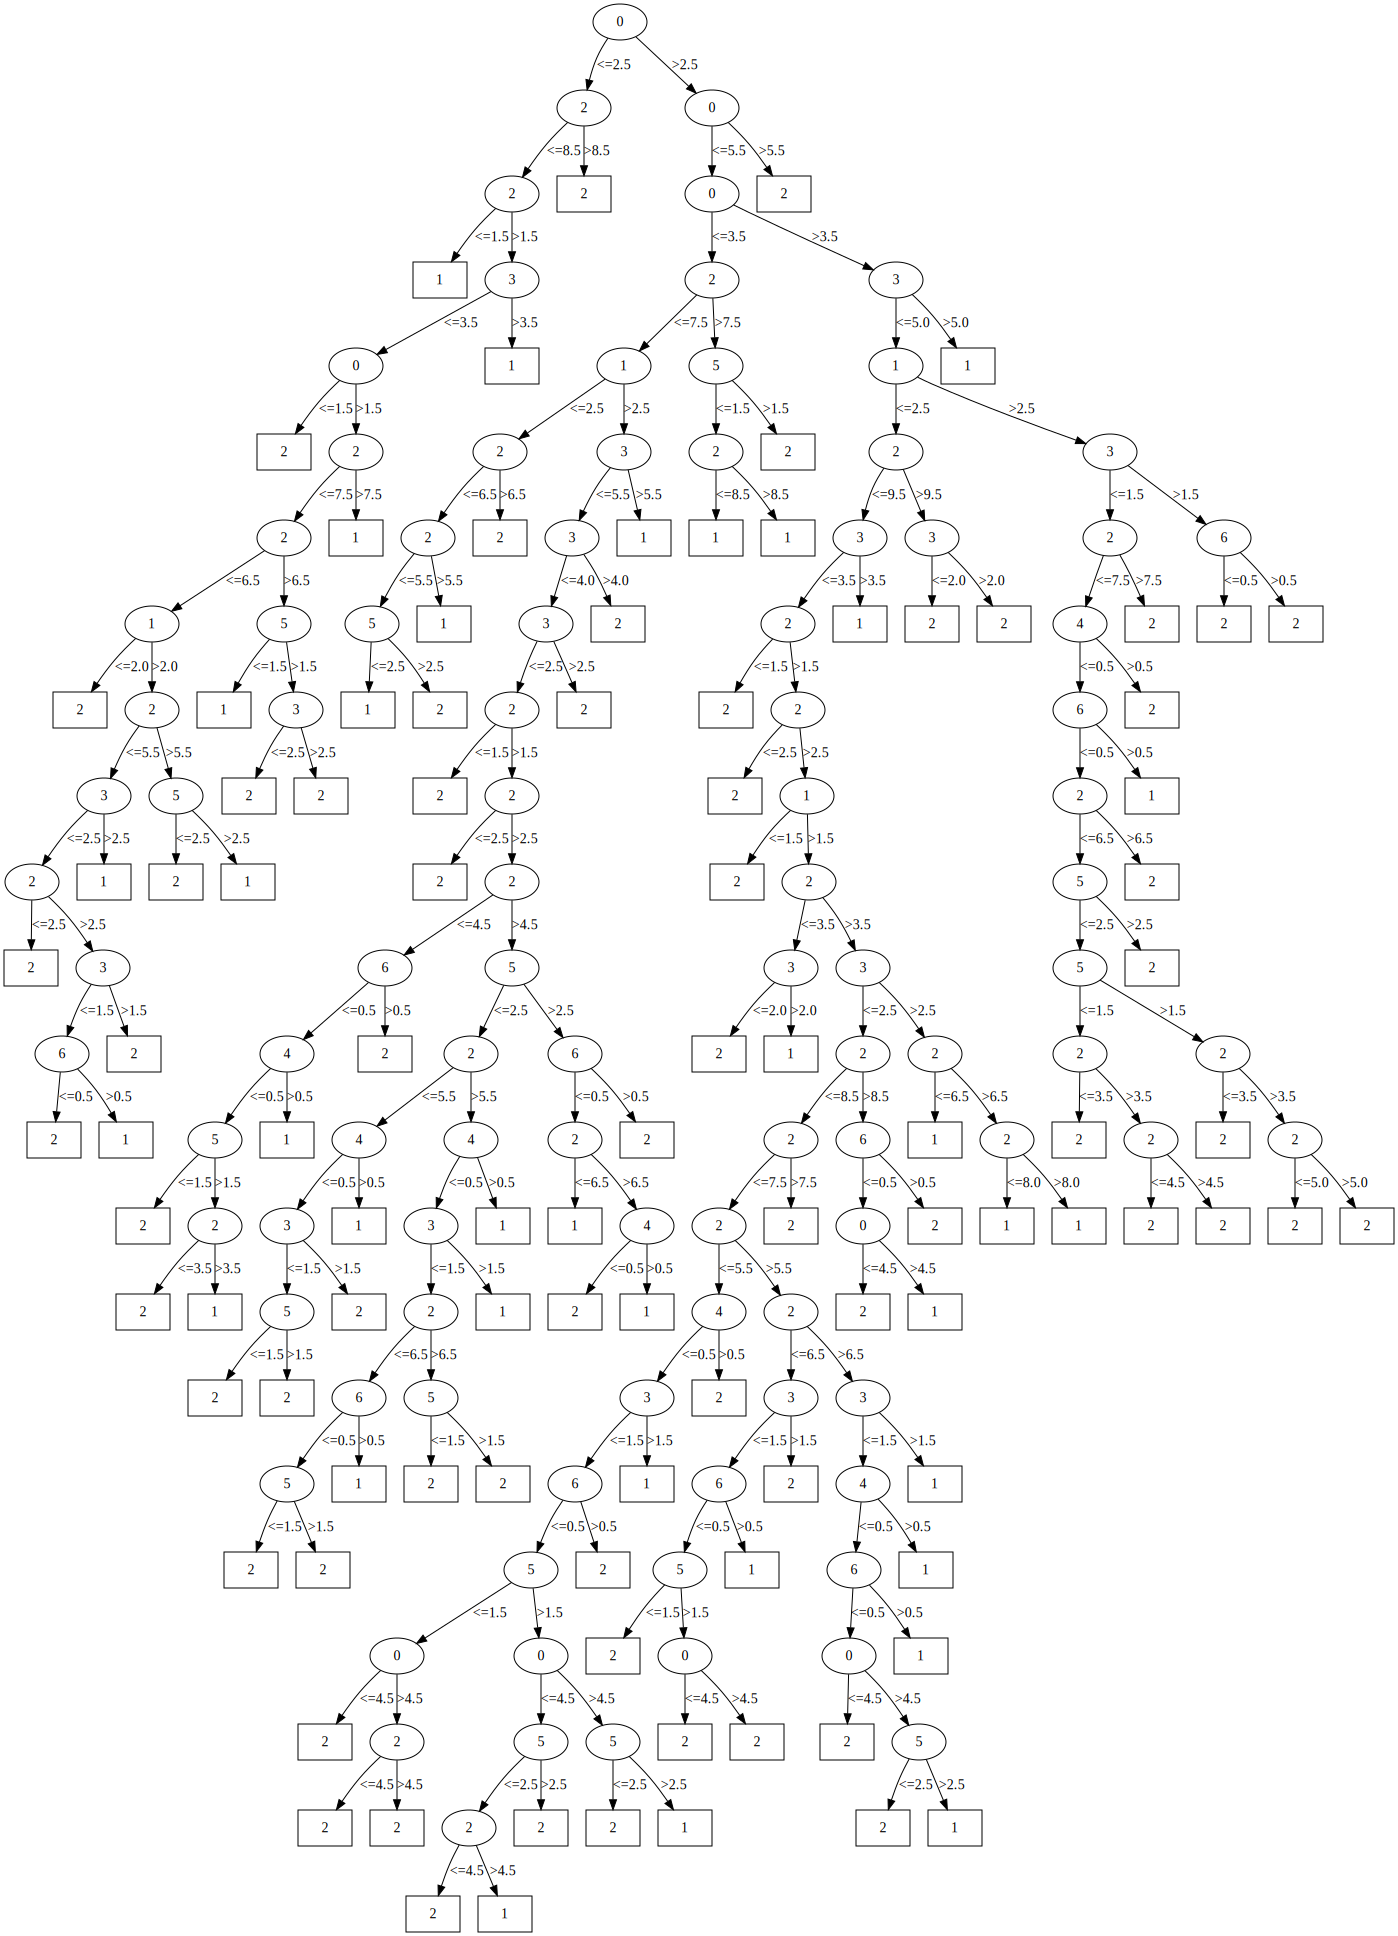

In [207]:
tree1.plot()